In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast
df = pd.read_csv(r'/Users/ethanjohn/Desktop/Data Science/Datasets/TMDB_movie_dataset_v11.csv')

columns = ['title', 'overview', 'popularity']

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             242706
revenue                       0
runtime                       0
adult                         0
backdrop_path            937207
budget                        0
homepage                1131158
imdb_id                  630434
original_language             0
original_title               13
overview                 274050
popularity                    0
poster_path              422511
tagline                 1086202
genres                   531177
production_companies     708057
production_countries     586118
spoken_languages         563089
keywords                 935898
dtype: int64


<Axes: >

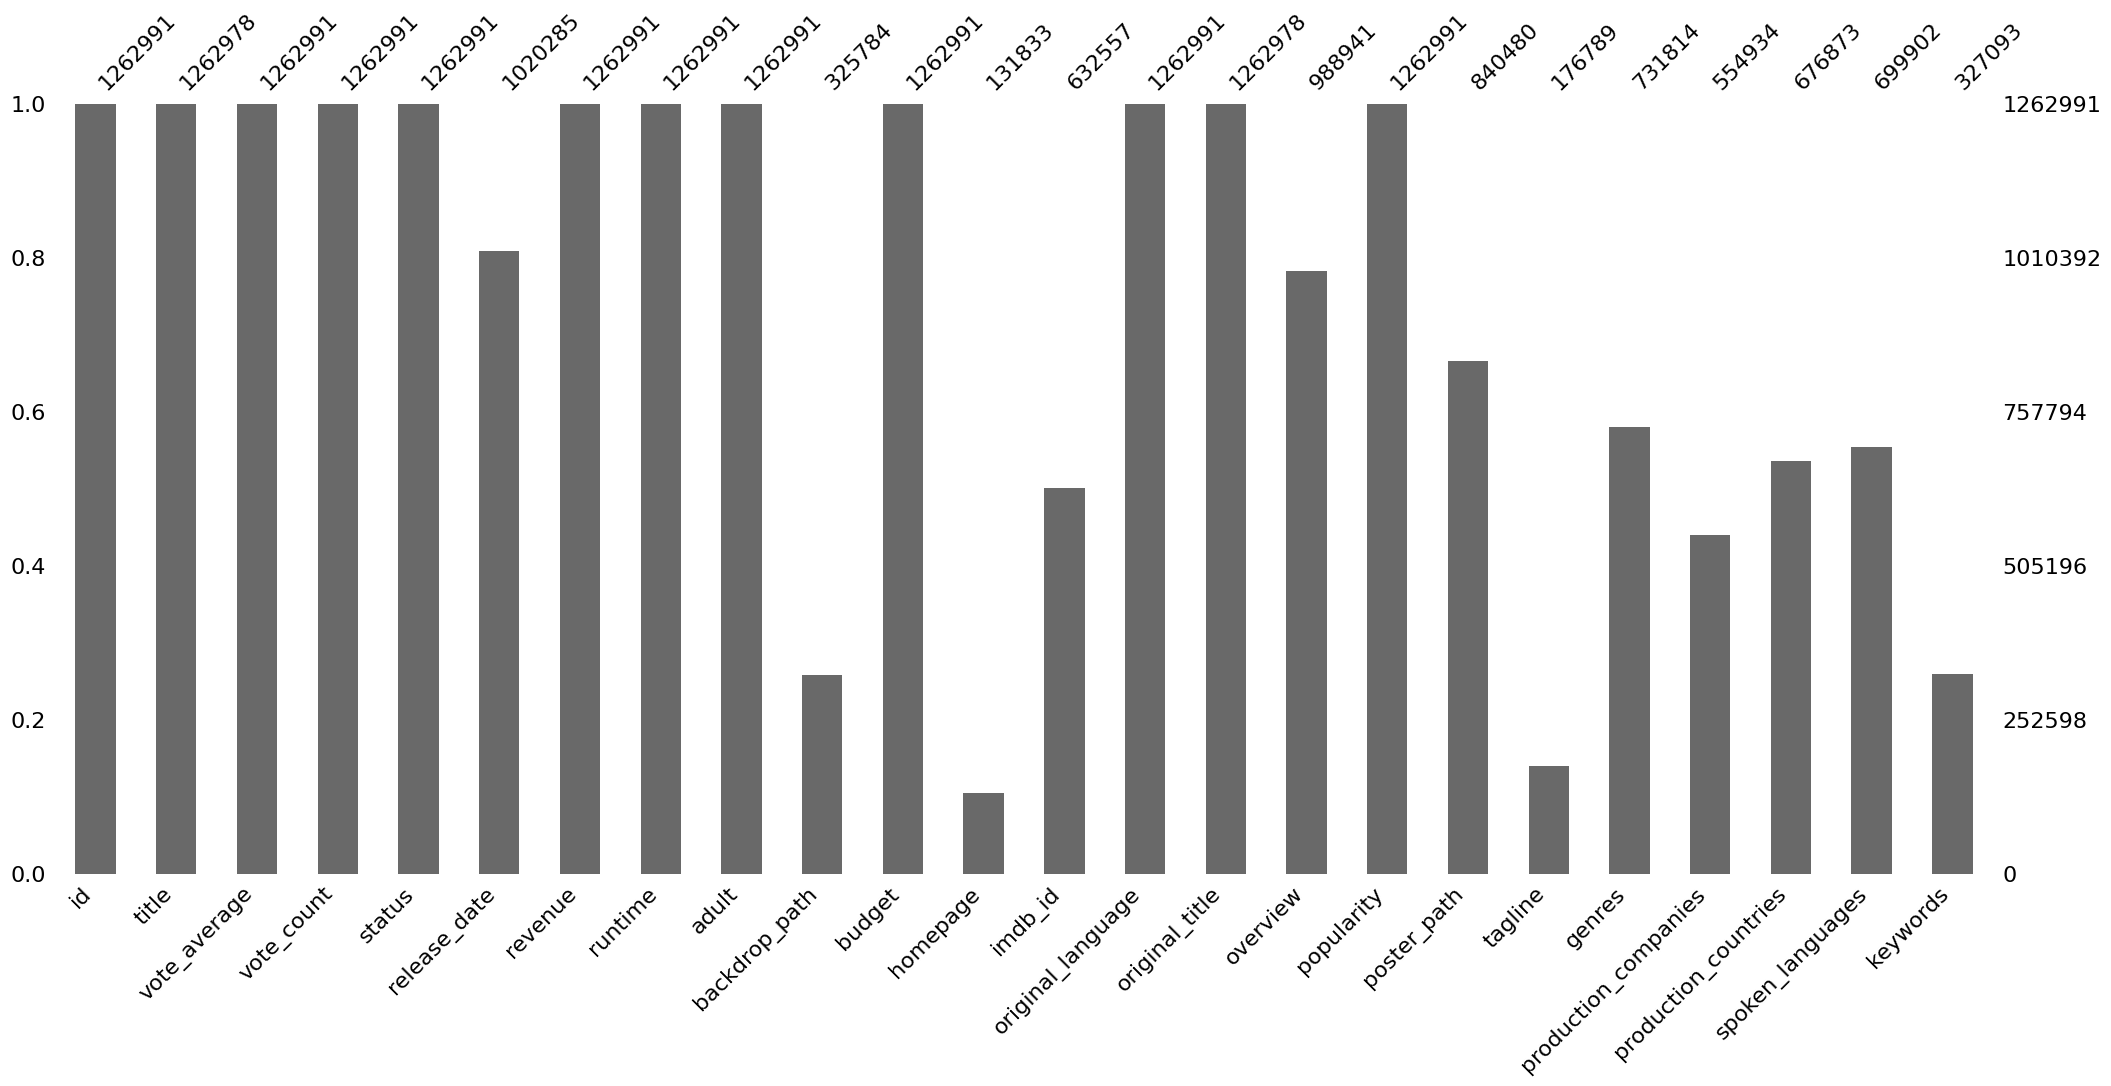

In [2]:
#print(df.isnull().sum())
#df.head()
#find and visualize missing data
print(df.isnull().sum())
msno.bar(df)


In [3]:
print(df.columns)
#scrap unnecessary columns and drop missing titles
cols = ['title', 'overview', 'genres', 'keywords', 'production_companies']
df = df[cols].dropna(subset=['title']).copy()


for col in ['overview', 'genres', 'keywords', 'production_companies']:
    df[col] = df[col].fillna('')


Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [4]:
#combining text
df[['genres', 'keywords', 'production_companies']]
print(df['genres'][0])

df['combined'] = (
    df['overview'] + ' ' +
    df['genres'] + ' ' +
    df['keywords'] + ' ' +
    df['production_companies']
)

print(df['combined'][0])

Action, Science Fiction, Adventure
Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person's idea into a target's subconscious. Action, Science Fiction, Adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious Legendary Pictures, Syncopy, Warner Bros. Pictures


In [5]:
#vectorizing text
vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(df['combined'])



In [22]:
df['title_lower'] = df['title'].str.lower()
indices = (
    df.reset_index()
    .drop_duplicates(subset='title_lower')
    .set_index('title_lower')['index']
)

def recommend(title, n=5):
    title = title.lower()
    if title not in indices:
        return 'Movie not found :('
    index = indices[title]
    similarity_scores = cosine_similarity(matrix[index], matrix).flatten()
    similarity_scores[index] = 0 
    top_indices = similarity_scores.argsort()[-n:][::-1]
    recommended_movies = df['title'].iloc[top_indices].tolist()
    return recommended_movies if recommended_movies else 'No recommendations found'


print(recommend('Cars'))


['Cars 2', 'Hiccups', 'Celebrating Route 66', "Driver's Ed Mutiny", 'U.S. Route 1 - ME']


In [33]:
def recommend_multiple(titles, n=5):
    titles = [i.lower() for i in titles]
    valid_indices = [indices[i] for i in titles if i in indices]
    if not valid_indices:
        return 'None of the movies found :('
    
    movie_vectors = matrix[valid_indices]
    avg_vector = movie_vectors.mean(axis=0)
    avg_vector = avg_vector.A
   

    similarity_scores = cosine_similarity(avg_vector, matrix).flatten()

    for idx in valid_indices:
        similarity_scores[idx] = 0
    
    top_indices = similarity_scores.argsort()[-n:][::-1]
    recommended_movies = df['title'].iloc[top_indices].tolist()
    return recommended_movies

print(recommend_multiple(['Cars', 'Wreck-it ralph', 'Planes: Fire & rescue'], n=5))

['A snowman VS a reindeer', 'Untitled seventh Ice Age film', 'Mickey & Anders har en bondegård', 'Walt Disney Animation Collection - Volume 3', 'Untitled Walt Disney Animation Studios film']
